In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import tensorflow as tf

In [19]:
DATADIR = "../images/PetImages"
CATEGORIES = ["Cat", "Dog"]
IMG_SIZE = 50

training_data = []

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for image in os.listdir(path):
        try: 
            img_array = cv2.imread(os.path.join(path,image), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append((new_array, class_num))


        except Exception as e:
            pass

print(len(training_data))

24946


In [20]:
random.shuffle(training_data)

In [28]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

#list to np array with size nº of features, size of image, 1 (grayscale)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
y = np.array(y)

In [29]:
# import pickle

# pickle_out = open("X.pickle", "wb")
# pickle.dump(X, pickle_out)
# pickle_out.close()

# pickle_out = open("y.pickle", "wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()

In [30]:

# X = pickle.load(open("X.pickle", "rb"))
# y = pickle.load(open("y.pickle", "rb"))


In [31]:
X = X / 255.0

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = X.shape[1:]),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.summary()

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6400)             

In [60]:
history = model.fit(X, y, epochs=8, batch_size=32, validation_split = 0.1)

Epoch 1/8
702/702 [==============================] - 8s 10ms/step - loss: 0.6486 - accuracy: 0.6118 - val_loss: 0.5637 - val_accuracy: 0.7070
Epoch 2/8
702/702 [==============================] - 7s 10ms/step - loss: 0.5501 - accuracy: 0.7217 - val_loss: 0.5058 - val_accuracy: 0.7539
Epoch 3/8
702/702 [==============================] - 7s 10ms/step - loss: 0.4894 - accuracy: 0.7662 - val_loss: 0.4713 - val_accuracy: 0.7788
Epoch 4/8
702/702 [==============================] - 7s 10ms/step - loss: 0.4470 - accuracy: 0.7925 - val_loss: 0.4535 - val_accuracy: 0.7928
Epoch 5/8
702/702 [==============================] - 7s 10ms/step - loss: 0.4143 - accuracy: 0.8132 - val_loss: 0.4530 - val_accuracy: 0.7788
Epoch 6/8
702/702 [==============================] - 7s 10ms/step - loss: 0.3893 - accuracy: 0.8282 - val_loss: 0.3811 - val_accuracy: 0.8429
Epoch 7/8
702/702 [==============================] - 7s 10ms/step - loss: 0.3642 - accuracy: 0.8400 - val_loss: 0.4118 - val_accuracy: 0.8164
Epoch 

In [61]:
model.save('animals_model.h5')

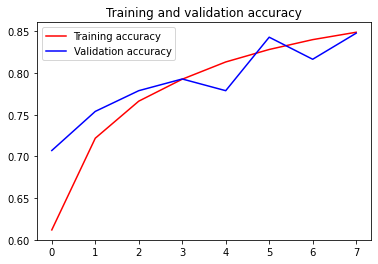

<Figure size 432x288 with 0 Axes>

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [64]:
model = tf.keras.models.load_model('animals_model.h5')

In [65]:
from numpy import round

def predict_image(path):
    img = tf.keras.preprocessing.image.load_img(path, grayscale=True, target_size=(50, 50))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img.reshape(-1, 50, 50, 1)
    img = img.astype('float32')
    img = img / 255.0

    predict_value = model.predict(img)
    prediction = round(predict_value)
    if(prediction):
        return "dog"
    else:
        return "cat"

In [70]:
predict_image("sample_image1.jpg")

'dog'

In [2]:
predict_image("sample_image2.jpg")

'cat'
